<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_logging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving & loading a trained policy

### Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, in colab: load additional packages for rendering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start() 
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [2]:
if 'google.colab' in sys.modules:
    !pip install -q easyagents >/dev/null

## Saving & Loading

Use `agent.save(directory)` to save the current policy to directory.
If you omit directory, then the policy is saved to a temp directory.
`save` always returns the location of the saved policy.

TypeError: 'NoneType' object is not iterable

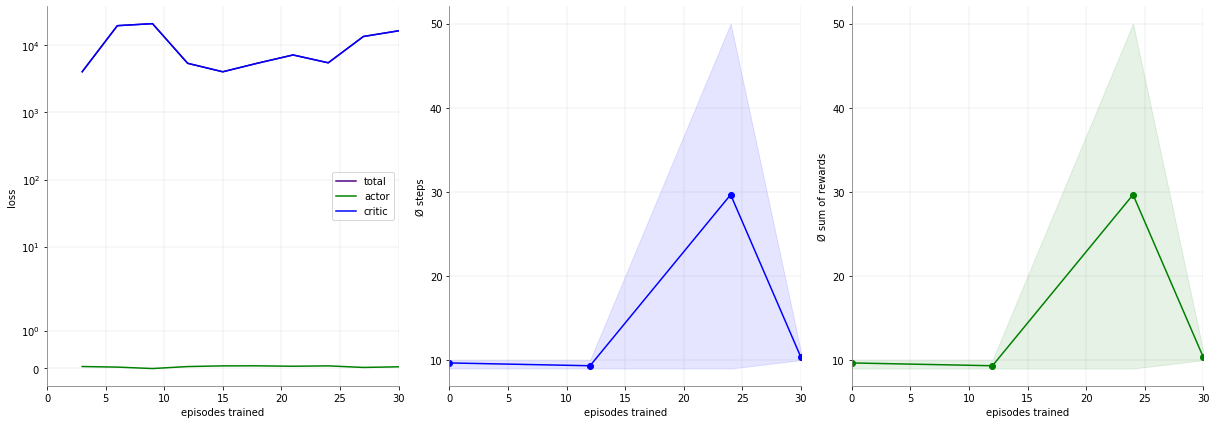

In [4]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import duration, log

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100,50))
ppoAgent.train([duration.Fast()])
directory = ppoAgent.save()
directory


To load a previously saved policy use `agent.load(director)`. Once loaded you may directly call `play()`:

In [1]:
ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100,50))
ppoAgent.load(directory)
ppoAgent.play()

Note to successfully load a policy, the agent must be instantiated identically as during training.
In particular, the name of the gym environment and the policy topology must be the same. 